In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


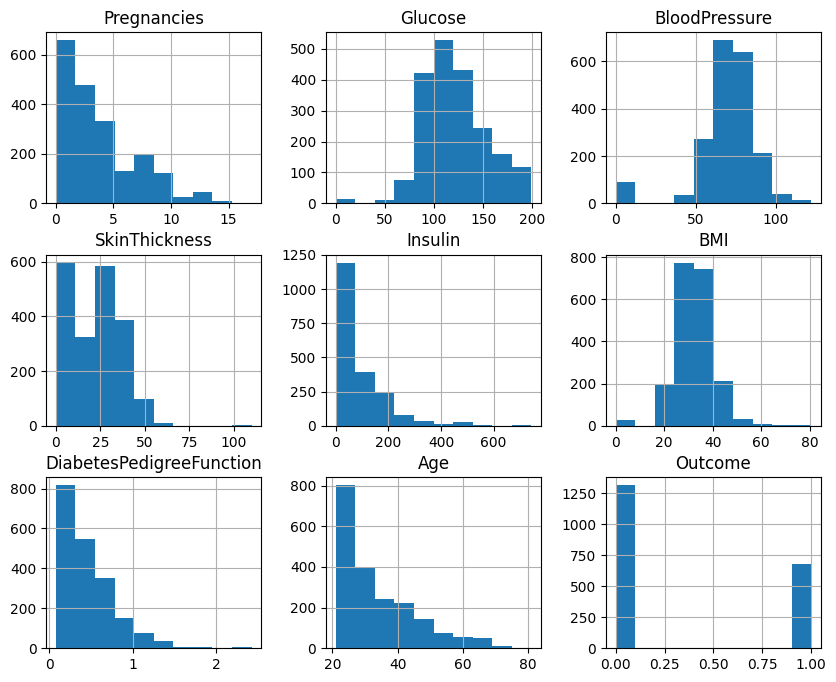

In [3]:
data.hist(bins=10,figsize=(10,8))
plt.show()

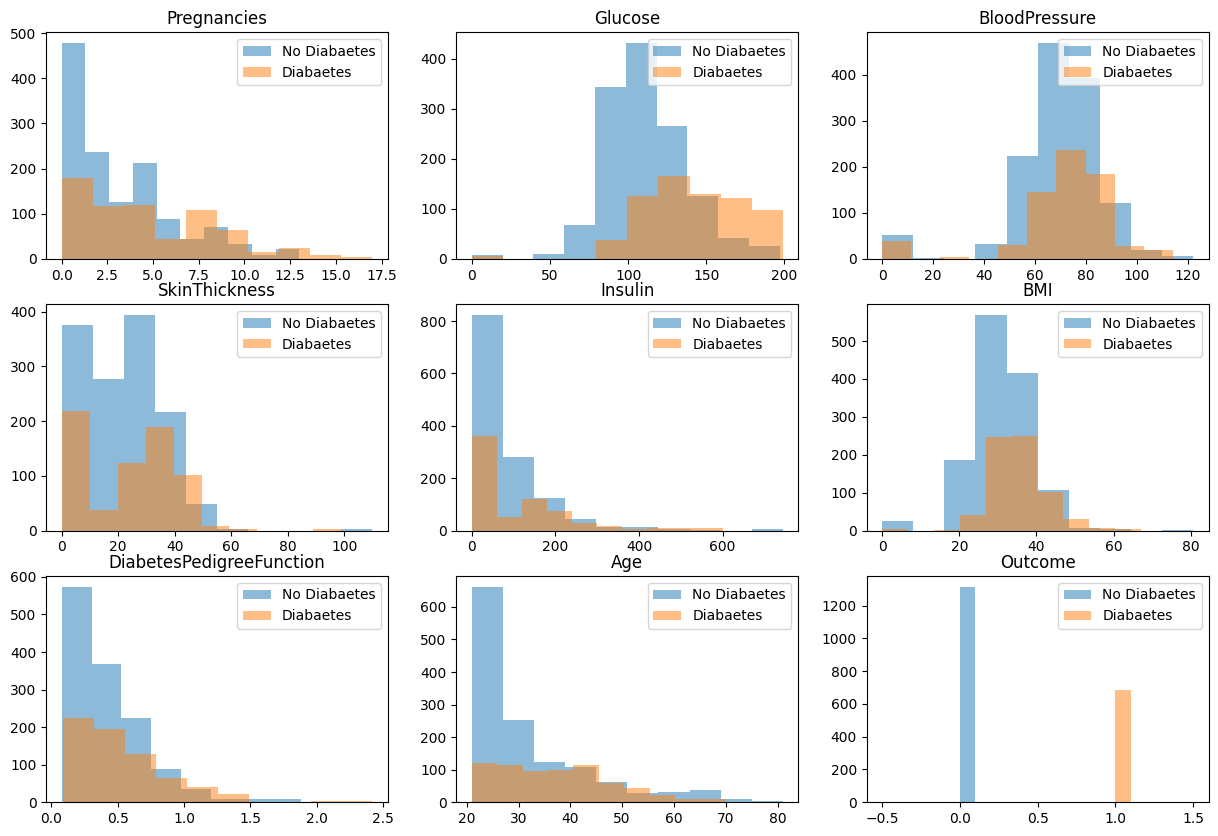

In [4]:
L0 = data.copy(deep = True)
L1 = data.copy(deep = True)
L0.drop(L0[L0["Outcome"]>0].index,inplace = True)
L1.drop(L1[L1["Outcome"]<1].index,inplace = True)

titles = L0.columns

f,a = plt.subplots(3,3,figsize=(15, 10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(L0[titles[idx]],alpha=0.5, label='No Diabaetes')
    ax.hist(L1[titles[idx]],alpha=0.5, label='Diabaetes')
    ax.set_title(titles[idx])
    ax.legend(loc='upper right')
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])
#plt.tight_layout()
    

<AxesSubplot: >

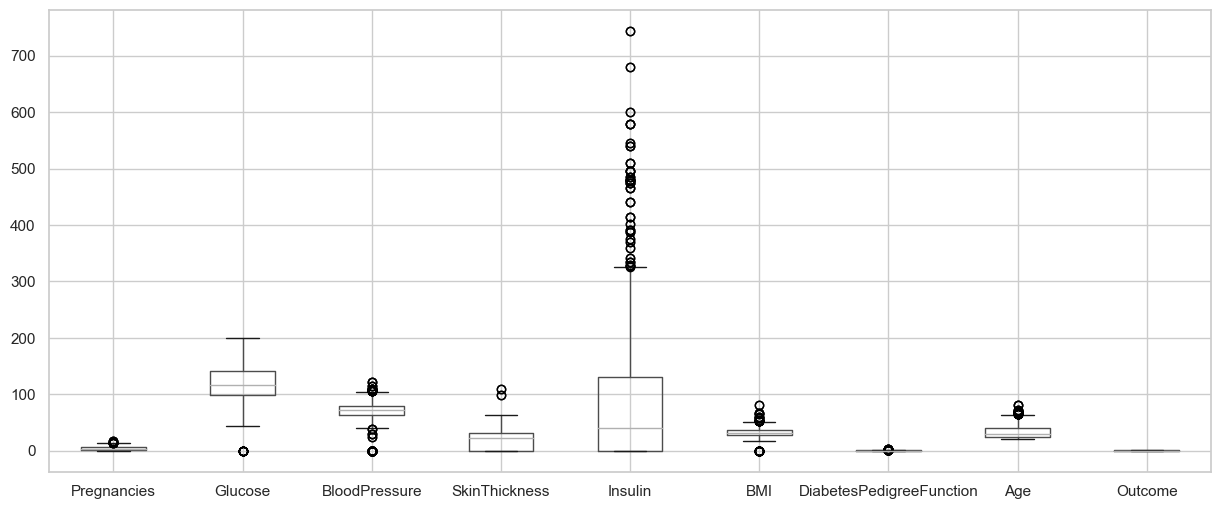

In [5]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

In [6]:
data.drop(data[data["Glucose"]<50].index,inplace = True)
data.drop(data[data["BloodPressure"]<20].index,inplace = True)
data.drop(data[data["BMI"]<10].index,inplace = True)
data.drop(data[data["Insulin"]>600].index,inplace = True)
data.drop(data[data["SkinThickness"]<1].index,inplace = True)
#data.drop(data[data["Insulin"]<1].index,inplace = True)


In [7]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


<AxesSubplot: >

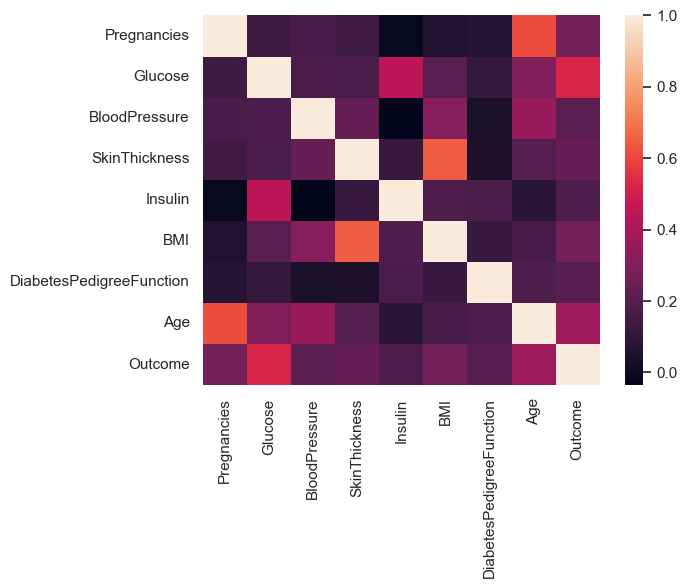

In [8]:
sns.heatmap(data.corr())

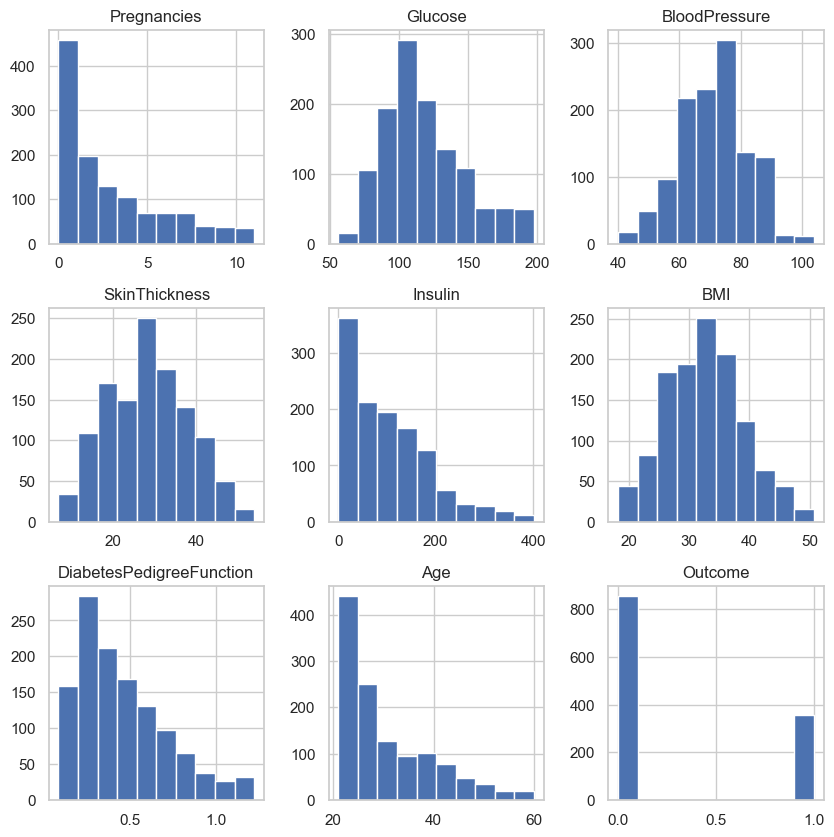

In [9]:
data.hist(bins=10,figsize=(10,10))
plt.show()

<AxesSubplot: >

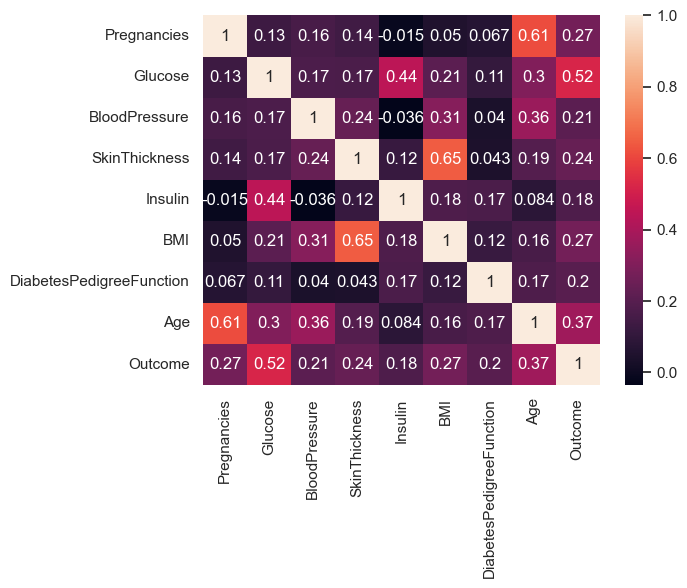

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
L0 = data.copy(deep = True)
L1 = data.copy(deep = True)
L0.drop(L0[L0["Outcome"]>0].index,inplace = True)
L1.drop(L1[L1["Outcome"]<1].index,inplace = True)

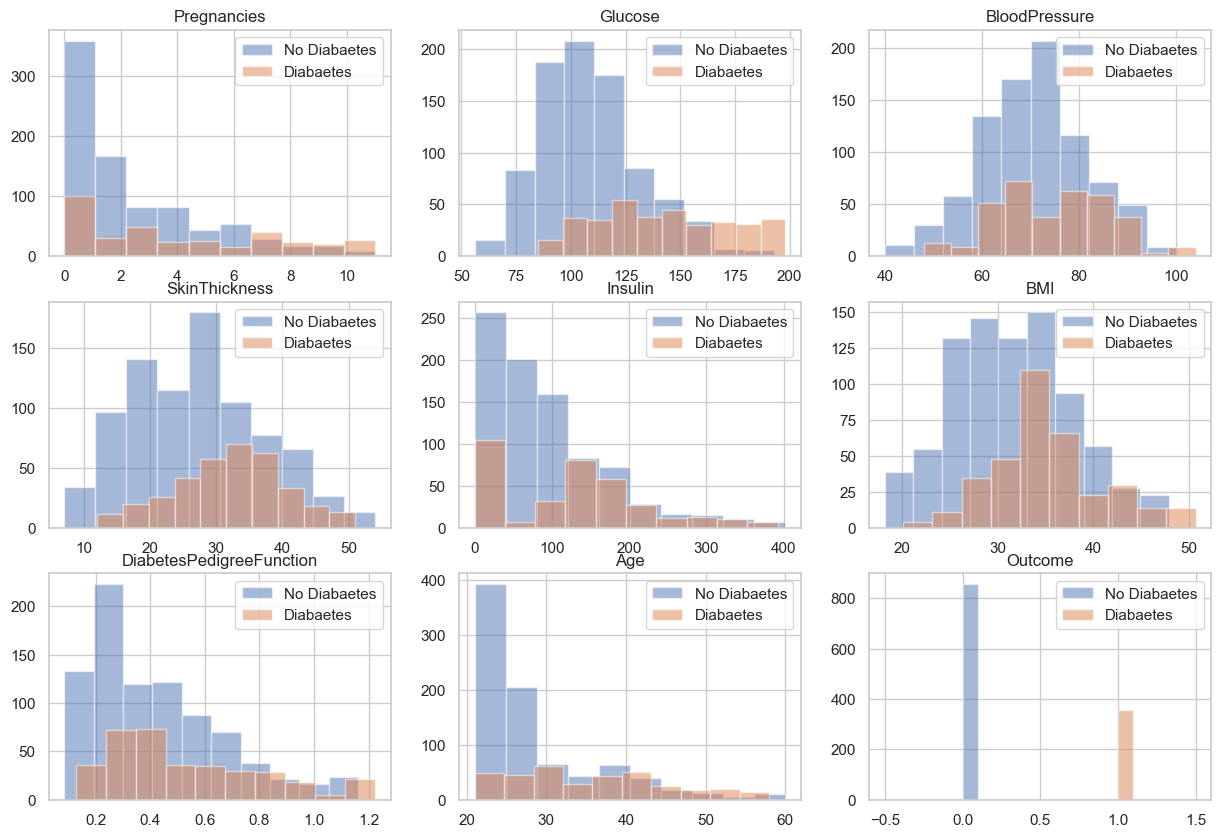

In [12]:
titles = L0.columns

f,a = plt.subplots(3,3,figsize=(15, 10))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(L0[titles[idx]],alpha=0.5, label='No Diabaetes')
    ax.hist(L1[titles[idx]],alpha=0.5, label='Diabaetes')
    ax.set_title(titles[idx])
    ax.legend(loc='upper right')
    #ax.set_xlabel(xaxes[idx])
    #ax.set_ylabel(yaxes[idx])
#plt.tight_layout()
    

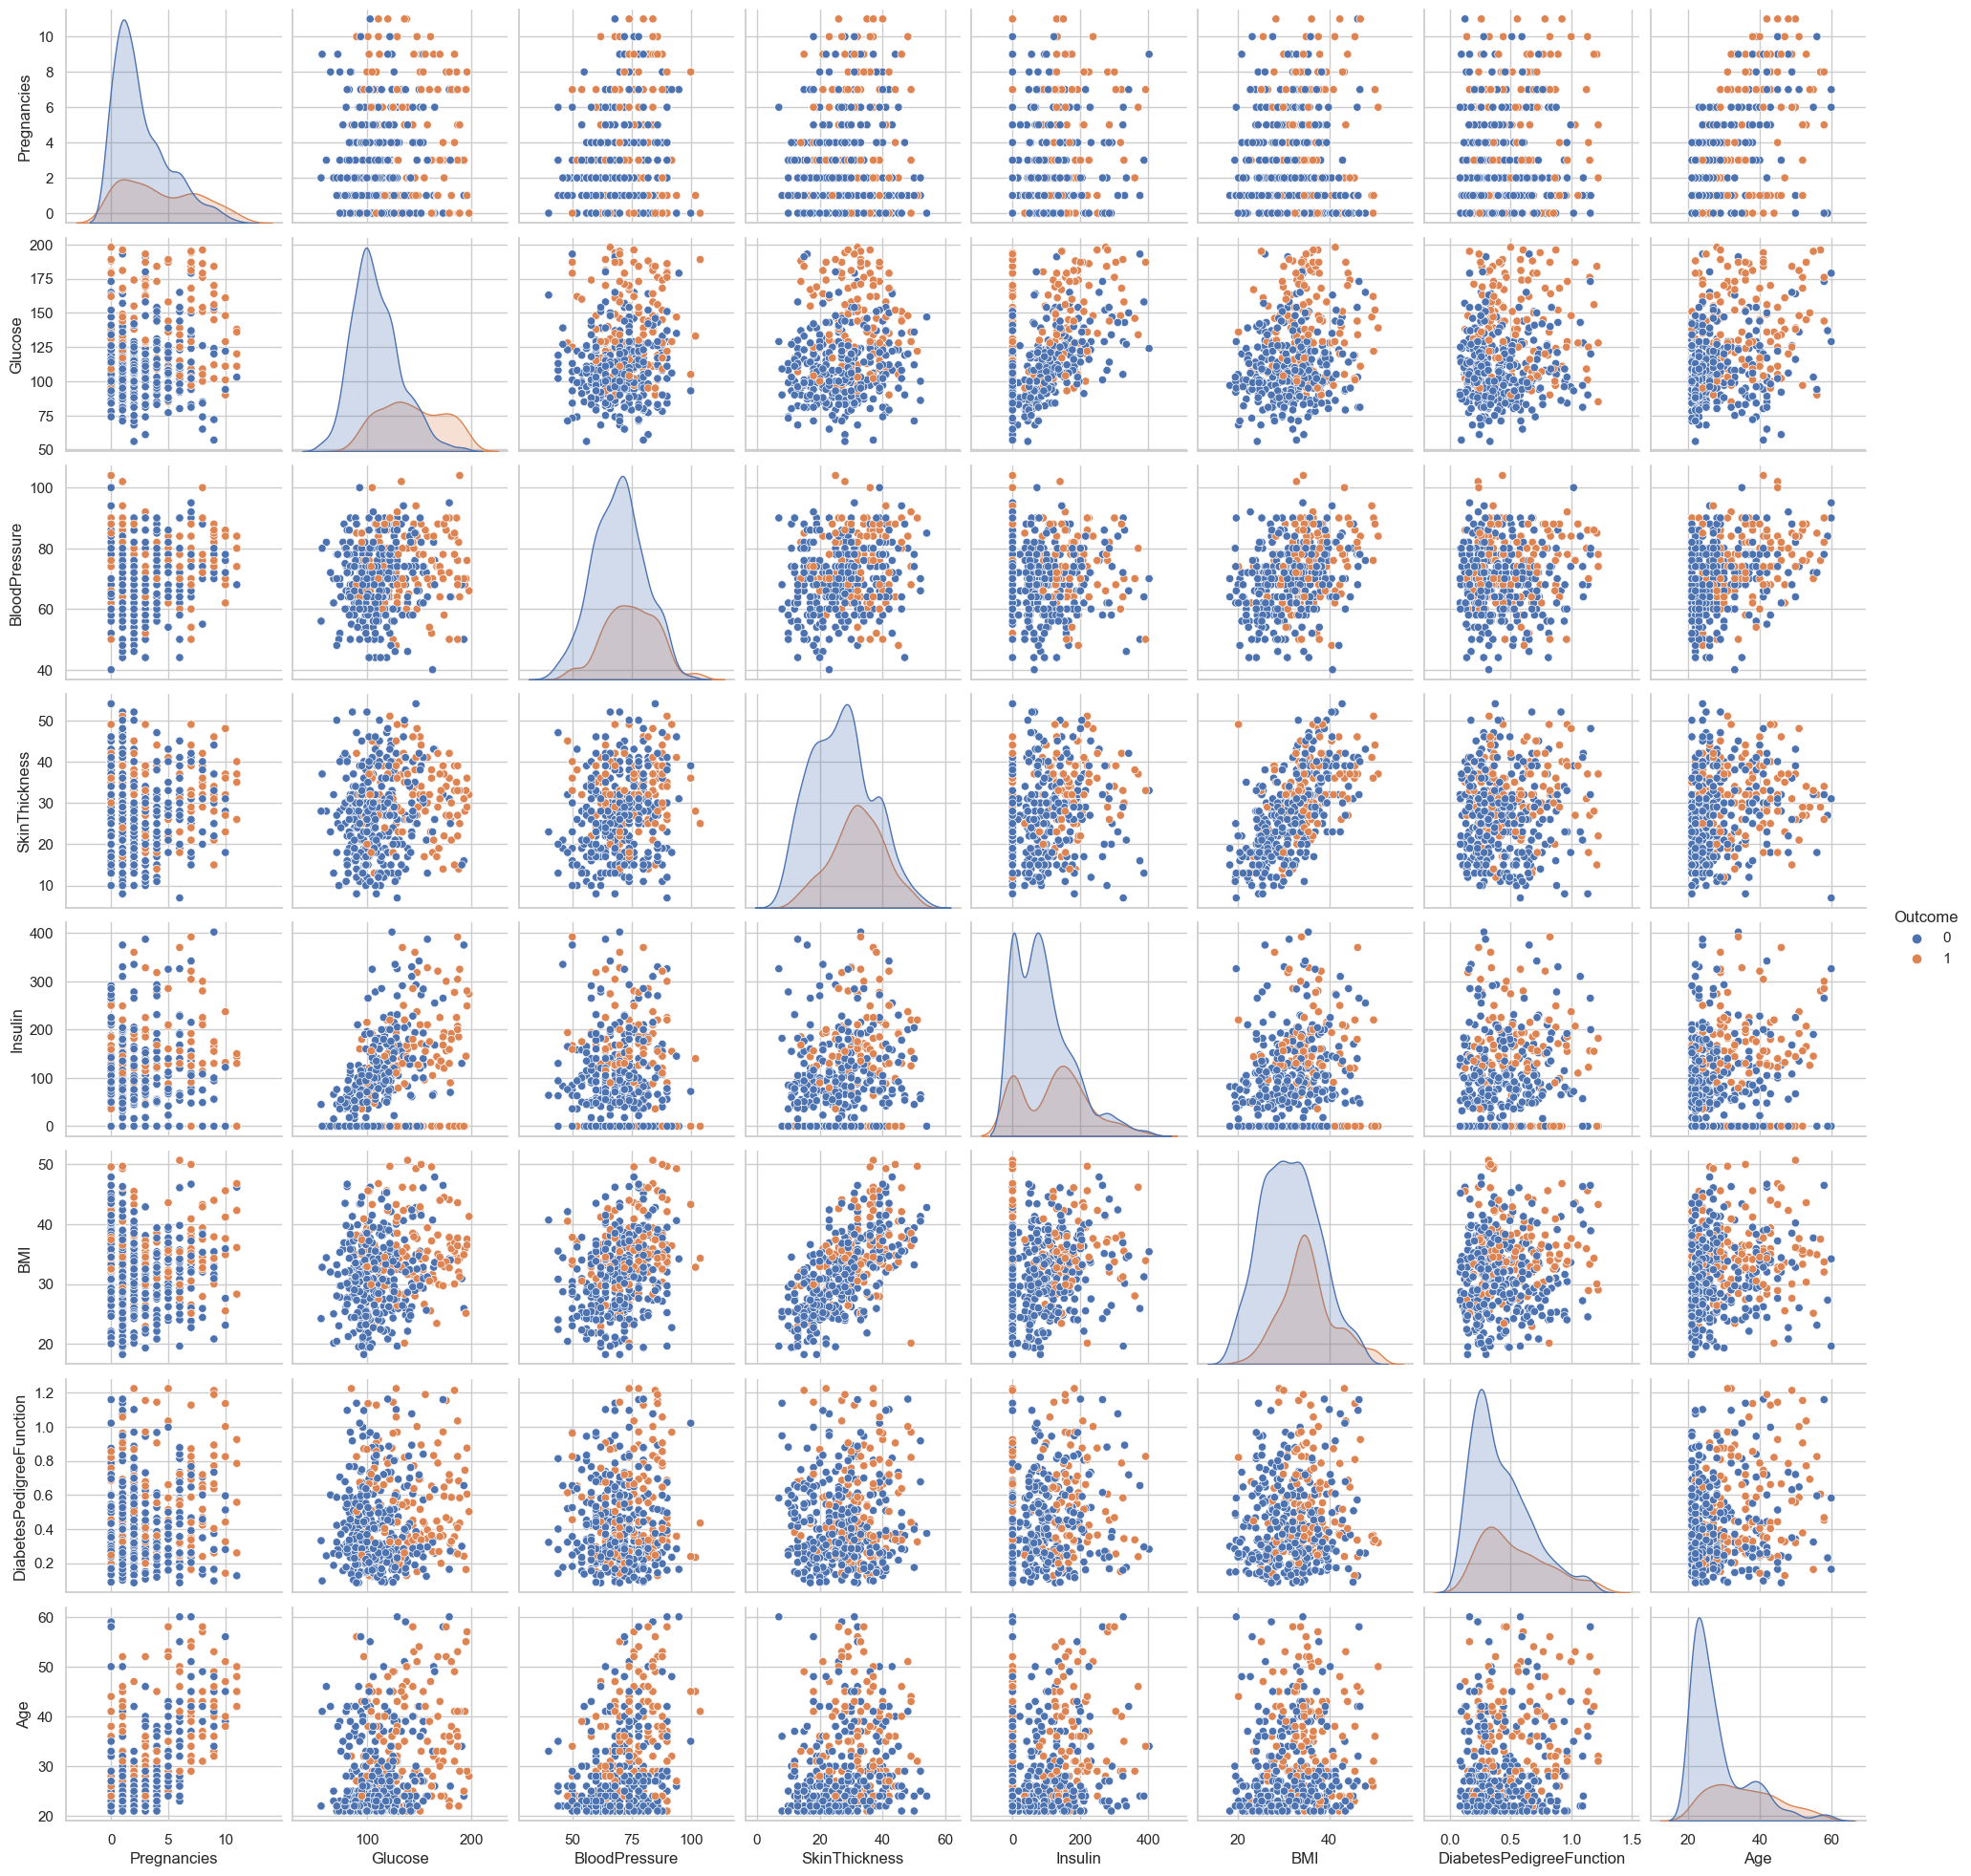

In [13]:
sns.pairplot(data,hue="Outcome")

In [14]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [15]:


from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.tree import plot_tree
from sklearn.metrics import roc_auc_score

feature_cols = [ 'Glucose', 'BloodPressure', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols] # Features
y = data["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9615384615384616


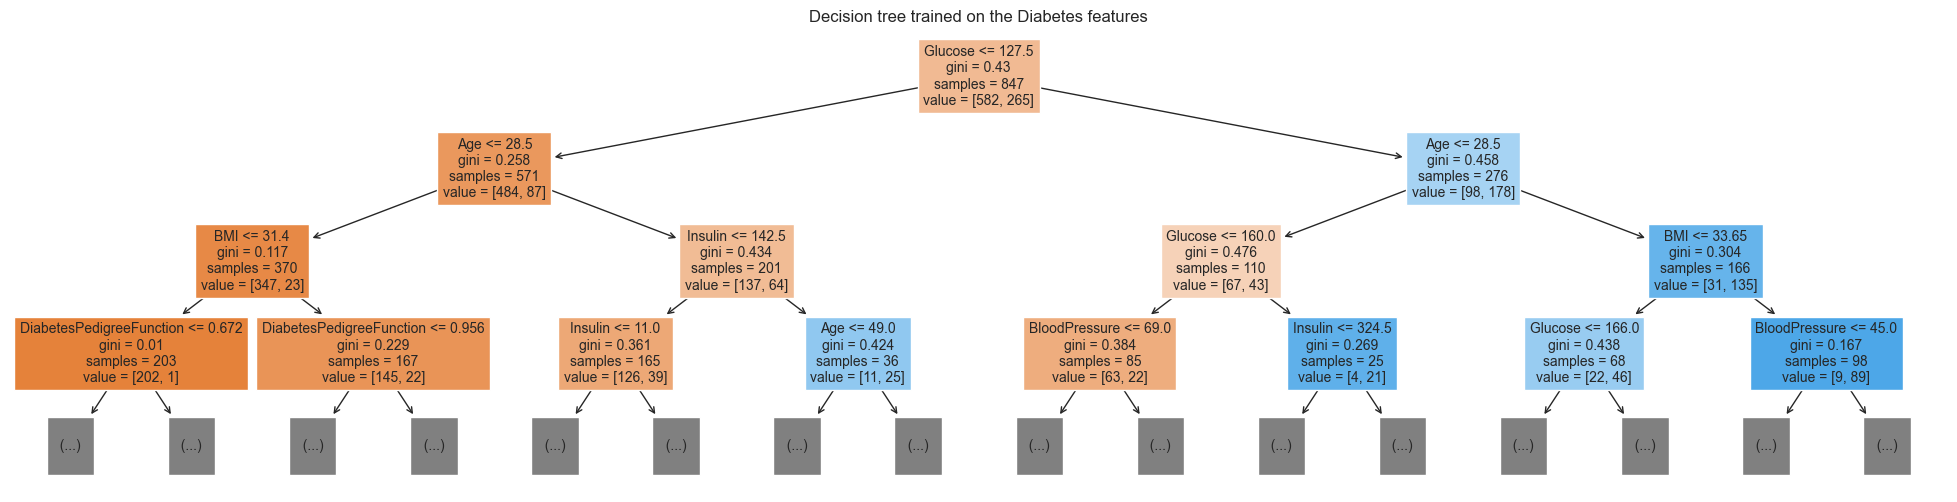

In [16]:


plt.figure(figsize=(25, 6))
plot_tree(clf,feature_names=feature_cols, filled=True, max_depth =3, fontsize = 10)
plt.title("Decision tree trained on the Diabetes features")
plt.show()


In [18]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[264  10]
 [  4  86]]
